In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('LGBM', lgbm)], final_estimator=cb, 
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('LGBM', LGBMRegressor())],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd1c068a3d0>,
                  passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9918247389385966

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [9]:
stacking_regressor4 = StackingRegressor(estimators=[('LGBM', lgbm)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [10]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd1c068a3d0>,
                  passthrough=True)

In [11]:
stacking_regressor4.score(X,y)

0.9922985709465891

In [12]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [13]:
scores4

{'fit_time': array([2.61381602, 2.53382921, 2.55567098, 2.56232882, 2.44252014]),
 'score_time': array([0.00528002, 0.00444698, 0.00484085, 0.00440931, 0.00529313]),
 'estimator': [StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd1e4879d00>,
                    passthrough=True),
  StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd1e4885f10>,
                    passthrough=True),
  StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd1e4885fa0>,
                    passthrough=True),
  StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd1e4885c40>,
                    passthrough=True),
  StackingRegress

In [14]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [15]:
cat = evaluate_model(cb, X, y)

In [16]:
cat

,fit_time,score_time,test_score
0,5.867149,0.007323,0.920566
1,5.758156,0.008709,0.899820
2,5.675910,0.010184,0.938045
3,5.571361,0.008576,0.933383
4,6.082030,0.007701,0.949361
5,10.716126,0.020891,0.934502
6,5.645961,0.008629,0.944618
7,5.517416,0.009684,0.924652
8,5.486224,0.008503,0.947610
9,5.488439,0.004098,0.883656


In [17]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [18]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [19]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [20]:
df4

,fit_time,score_time,test_score
0,7.142146,0.017066,0.912554
1,7.456236,0.014852,0.897429
2,7.149130,0.016369,0.927797
3,7.081960,0.017848,0.922107
4,7.821905,0.015012,0.946770
5,7.206399,0.018302,0.923301
6,7.147693,0.020003,0.939850
7,6.897565,0.017412,0.923807
8,6.587839,0.012392,0.943038
9,6.951632,0.011014,0.888245


In [21]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [22]:
df4

,test_score_4
0,0.912554
1,0.897429
2,0.927797
3,0.922107
4,0.946770
5,0.923301
6,0.939850
7,0.923807
8,0.943038
9,0.888245


In [23]:
combo = pd.concat([cat, df4], axis=1)

In [24]:
combo

,cat_score,test_score_4
0,0.920566,0.912554
1,0.899820,0.897429
2,0.938045,0.927797
3,0.933383,0.922107
4,0.949361,0.946770
5,0.934502,0.923301
6,0.944618,0.939850
7,0.924652,0.923807
8,0.947610,0.943038
9,0.883656,0.888245


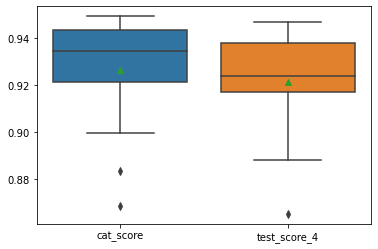

In [25]:
sns.boxplot(data=combo, showmeans=True);

In [26]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926385,0.921359
std,0.024378,0.022562
min,0.868666,0.865211
25%,0.921228,0.917330
50%,0.934502,0.923829
75%,0.943737,0.938116
max,0.949361,0.946770
